## Data Preparation
#### Nesta fase os dados foram preparados para integração em modelos de machine learning na fase de Modeling
#### As séries temporais "male", "female", "young" e "adult" foram retiradas dos dados uma vez que o nosso objetivo é orientado para a série "all"
#### A coluna "date" também foi removida porque apenas serve para nos situarmos no tempo, para a divisão dos dados em antigos=treino, recentes=teste. Além disso a sua natureza única (única por observação) apenas iria trazer incerteza para os modelos.
#### Para lidar com os valores outliers foram criados 2 cenários:
<ul>
    <li><b>Com outliers</b> - Neste cenário os valores outliers não foram tratados</li>
    <li><b>Sem outliers s/ compensação</b> - Neste cenário os valores outliers foram tratados</li>
    <li><b>Com identificação de dias Feriados</b> - Para cada um dos dias observados conta, também, a designação de se o dia se trata de um feriado ou não</li>

</ul>

#### Por fim os dados de cada cenário foram exportados para os respetivos ficheiros csv para poderem ser utilizados nas fases seguintes 

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Importar Dados

In [2]:
# Importar os dados
# Importar dados originais (cenario 1)
data <- read.csv(file = '../data/store.csv', sep = ';')

# Importar dados com feriados (cenario 3)
dataferiados <- read.csv(file = '../data/DadosFeriados.csv')
dataferiados <- dataferiados %>%
    select(-X)

cat("Dados Cenario 1")
head(data)
cat("Dados Cenario 3")
head(dataferiados)

Dados Cenario 1

date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
2013-04-09,2332,1115,1108,1122,1210,Rain,13,87,0
2013-04-10,2801,1217,1459,1239,1562,Rain,14,94,45
2013-04-11,2375,1168,1099,1059,1316,Rain,14,82,55
2013-04-12,3447,1617,1651,1606,1841,Sunny,13,78,0
2013-04-13,4823,2469,2117,2318,2505,Rain,16,81,37
2013-04-14,4978,2564,2223,2289,2689,Rain,16,73,0


Dados Cenario 3

date,all,female,male,young,adult,weather,maxtemp,RH,maxwind,holiday
2013-04-09,2332,1115,1108,1122,1210,Rain,13,87,0,0
2013-04-10,2801,1217,1459,1239,1562,Rain,14,94,45,0
2013-04-11,2375,1168,1099,1059,1316,Rain,14,82,55,0
2013-04-12,3447,1617,1651,1606,1841,Sunny,13,78,0,0
2013-04-13,4823,2469,2117,2318,2505,Rain,16,81,37,0
2013-04-14,4978,2564,2223,2289,2689,Rain,16,73,0,0


## Cenario 1

In [91]:
# Criação de dataframes para cada série temporal
# TS ALl
data1 <- data %>%
    select(-date,-female,-male,-young,-adult)

# TS Female
data2 <- data %>%
    select(-date,-all,-male,-young,-adult)

# TS Male
data3 <- data %>%
    select(-date,-female,-all,-young,-adult)

# TS Young
data4 <- data %>%
    select(-date,-female,-male,-all,-adult)

# TS Adult
data5 <- data %>%
    select(-date,-female,-male,-young,-all)

# Substituir a variavel categórica weather por 0=RAIN e 1=SUNNY 
data1$weather <- ifelse(data$weather=="Rain", 0, 1)
data2$weather <- ifelse(data$weather=="Rain", 0, 1)
data3$weather <- ifelse(data$weather=="Rain", 0, 1)
data4$weather <- ifelse(data$weather=="Rain", 0, 1)
data5$weather <- ifelse(data$weather=="Rain", 0, 1)

# Ver como ficou o dataframe
cat("Serie Temporal All")
head(data1)
cat("Serie Temporal Female")
head(data2)
cat("Serie Temporal All")
head(data3)
cat("Serie Temporal All")
head(data4)
cat("Serie Temporal All")
head(data5)

all,weather,maxtemp,RH,maxwind
2332,0,13,87,0
2801,0,14,94,45
2375,0,14,82,55
3447,1,13,78,0
4823,0,16,81,37
4978,0,16,73,0


female,weather,maxtemp,RH,maxwind
1115,0,13,87,0
1217,0,14,94,45
1168,0,14,82,55
1617,1,13,78,0
2469,0,16,81,37
2564,0,16,73,0


male,weather,maxtemp,RH,maxwind
1108,0,13,87,0
1459,0,14,94,45
1099,0,14,82,55
1651,1,13,78,0
2117,0,16,81,37
2223,0,16,73,0


young,weather,maxtemp,RH,maxwind
1122,0,13,87,0
1239,0,14,94,45
1059,0,14,82,55
1606,1,13,78,0
2318,0,16,81,37
2289,0,16,73,0


adult,weather,maxtemp,RH,maxwind
1210,0,13,87,0
1562,0,14,94,45
1316,0,14,82,55
1841,1,13,78,0
2505,0,16,81,37
2689,0,16,73,0


In [92]:
summary(data$all) # mean = 3648

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    375    2569    3643    3648    4314   15735 

### Cenario 2

In [93]:
# Cenario 2
#summary(data1$all)

#boxplot(data1$all, main="Boxplot All", ylab="Frequencia")$out
#cat("nº outliers:",length(boxplot(data1$all, main="Boxplot All", ylab="Frequencia")$out))

# ver que observações correspondem aos valores de 7961 9371 9163 8300 8270 15735 7719 11110
#data1[data1[,1] %in% outliers,]

#TS ALL
outlierRows1 = c(117,118,129,141,178,181,222,250)

# Series Temporais
# TS ALL
dataSout1 = data1

for (b in 1:length(outlierRows1)){
        
    dataSout1[outlierRows1[b],]$all = 3648
    
}

outlierRows1 = c(249)

for (b in 1:length(outlierRows1)){
        
    dataSout1[outlierRows1[b],]$all = 3648
    
}

#cat("Serie Temporal: ALL (dataSout1)")
#boxplot(dataSout1$all, main="Boxplot All", ylab="Frequencia")$out
#cat("nº outliers:",length(boxplot(dataSout1$all, main="Boxplot All", ylab="Frequencia")$out))

#dataSout1[dataSout1$all %in% 6804,]

# Tratar as observações outliers substituindo pela media (2º run)
#dataSout1[249,]$all = 3648

#boxplot(dataSout1$all, main="Boxplot All", ylab="Frequencia")$out
#cat("nº outliers:",length(boxplot(dataSout1$all, main="Boxplot All", ylab="Frequencia")$out))

Time Series All (TS1)

numeric(0)

nº outliers: 0

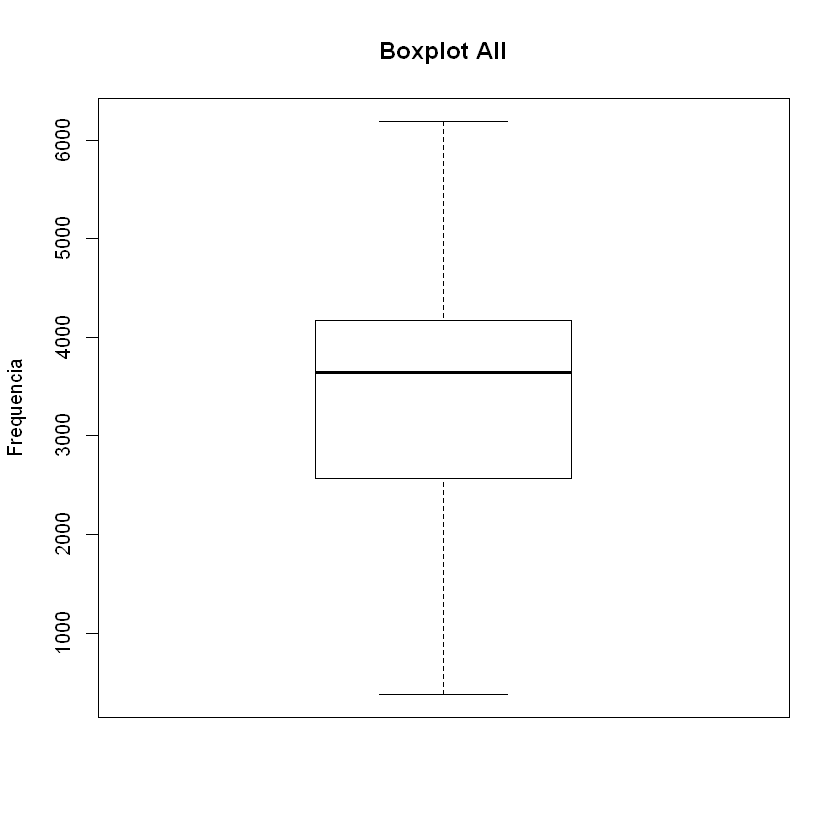

In [98]:
cat("Time Series All (TS1)")
boxplot(dataSout1$all, main="Boxplot All", ylab="Frequencia")$out
cat("nº outliers:",length(boxplot(dataSout1$all, main="Boxplot All", ylab="Frequencia")$out))

In [99]:
outliers1 = c(7961, 9371, 9163, 8300, 8270, 15735, 7719, 11110)
outliers2 = c(6804)
data1[dataSout1[,1] %in% outliers2,]

all,weather,maxtemp,RH,maxwind


## Cenario 3

In [3]:
# Remover a data e restantes séries temporais do dataframe 
# (ter cuidado com o metodo profet) / saber se é feriado pode ser util ou o dia da semana
# TS ALl
dataferiados1 <- dataferiados %>%
    select(-date,-female,-male,-young,-adult)

# TS Female
dataferiados2 <- dataferiados %>%
    select(-date,-all,-male,-young,-adult)

# TS Male
dataferiados3 <- dataferiados %>%
    select(-date,-female,-all,-young,-adult)

# TS Young
dataferiados4 <- dataferiados %>%
    select(-date,-female,-male,-all,-adult)

# TS Adult
dataferiados5 <- dataferiados %>%
    select(-date,-female,-male,-young,-all)

# Substituir a variavel categórica weather por 0=RAIN e 1=SUNNY 
dataferiados1$weather <- ifelse(dataferiados1$weather=="Rain", 0, 1)
dataferiados2$weather <- ifelse(dataferiados2$weather=="Rain", 0, 1)
dataferiados3$weather <- ifelse(dataferiados3$weather=="Rain", 0, 1)
dataferiados4$weather <- ifelse(dataferiados4$weather=="Rain", 0, 1)
dataferiados5$weather <- ifelse(dataferiados5$weather=="Rain", 0, 1)


# Ver como ficaram os dataframes
head(dataferiados1)
head(dataferiados2)
head(dataferiados3)
head(dataferiados4)
head(dataferiados5)

all,weather,maxtemp,RH,maxwind,holiday
2332,0,13,87,0,0
2801,0,14,94,45,0
2375,0,14,82,55,0
3447,1,13,78,0,0
4823,0,16,81,37,0
4978,0,16,73,0,0


female,weather,maxtemp,RH,maxwind,holiday
1115,0,13,87,0,0
1217,0,14,94,45,0
1168,0,14,82,55,0
1617,1,13,78,0,0
2469,0,16,81,37,0
2564,0,16,73,0,0


male,weather,maxtemp,RH,maxwind,holiday
1108,0,13,87,0,0
1459,0,14,94,45,0
1099,0,14,82,55,0
1651,1,13,78,0,0
2117,0,16,81,37,0
2223,0,16,73,0,0


young,weather,maxtemp,RH,maxwind,holiday
1122,0,13,87,0,0
1239,0,14,94,45,0
1059,0,14,82,55,0
1606,1,13,78,0,0
2318,0,16,81,37,0
2289,0,16,73,0,0


adult,weather,maxtemp,RH,maxwind,holiday
1210,0,13,87,0,0
1562,0,14,94,45,0
1316,0,14,82,55,0
1841,1,13,78,0,0
2505,0,16,81,37,0
2689,0,16,73,0,0


## Exportar os Datasets

In [4]:
# Exportar os dados preparados para o seu csv respetivo

# # CENARIO 1
# # Serie Temporal All
# write.csv(data1, "./cenarios/Cenario 1/TS1.csv")

# # Serie Temporal Female
# write.csv(data2, "./cenarios/Cenario 1/TS2.csv")

# # Serie Temporal Male
# write.csv(data3, "./cenarios/Cenario 1/TS3.csv")

# # Serie Temporal Young
# write.csv(data4, "./cenarios/Cenario 1/TS4.csv")

# # Serie Temporal Adult
# write.csv(data5, "./cenarios/Cenario 1/TS5.csv")

# # ----------------------------------------------------------------------------------------------------------------------------


# #CENARIO 2
# # Serie Temporal All
# write.csv(dataSout1, "./cenarios/Cenario 2/TS1.csv")

# ----------------------------------------------------------------------------------------------------------------------------


#CENARIO 3
write.csv(dataferiados1, "./cenarios/Cenario 3/TS1.csv")

# Serie Temporal Female
write.csv(dataferiados2, "./cenarios/Cenario 3/TS2.csv")

# Serie Temporal Male
write.csv(dataferiados3, "./cenarios/Cenario 3/TS3.csv")

# Serie Temporal Young
write.csv(dataferiados4, "./cenarios/Cenario 3/TS4.csv")

# Serie Temporal Adult
write.csv(dataferiados5, "./cenarios/Cenario 3/TS5.csv")

# ----------------------------------------------------------------------------------------------------------------------------

# Export do dataset completo organizado em tabela
# write.csv(data, "./exported data/TodosDadosTab.csv")